In [1]:
from utils import hide, unhide, resize_crop
from PIL import Image

In [2]:
def concat_img(direction='h', *images):
    d = 1 if direction == 'h' else -1
    w, h = images[0].size[::d]
    result = Image.new('RGB', (w * len(images), h)[::d])
    for i, img in enumerate(images):
        result.paste(resize_crop(img, *(w, h)[::d]), (w * i, 0)[::d])
    return result

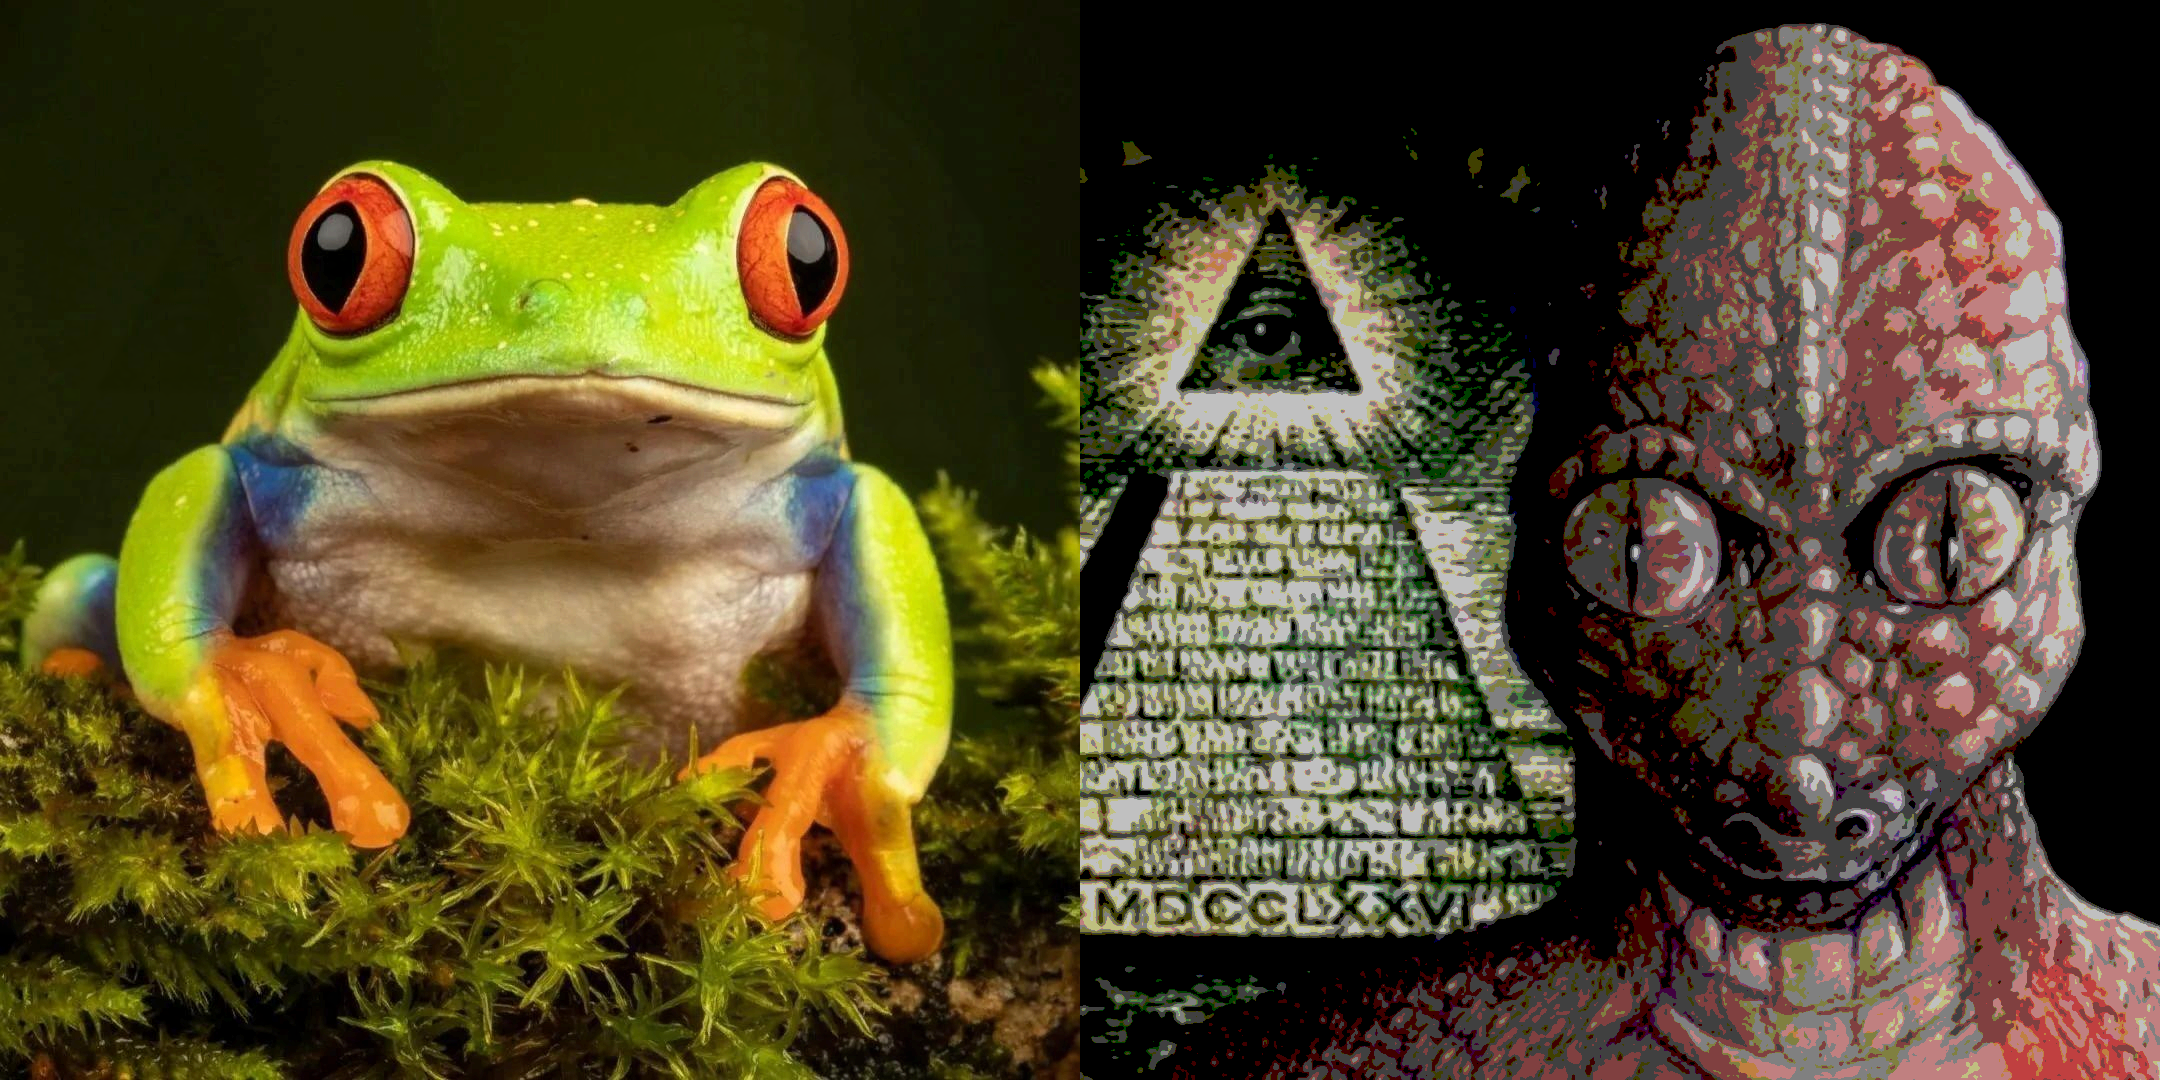

In [3]:
source = 'images/frog.jpg'
secret = 'images/secret.jpg'

result = hide(source, secret, None, 2)
hidden = unhide(result, None, 2)

concat_img('h', result, hidden)